In [1]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "end_to_end_project"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

In [2]:
#https://www.kaggle.com/lampubhutia/loandefault-ltfs-avml-finhack/data#

In [3]:
import pandas as pd

LOAN_DEFAULT_PATH = os.path.join("datasets", "loan_default")

def load_loan_default_data(ld_path=LOAN_DEFAULT_PATH):
    csv_path = os.path.join(ld_path, "train_LTFS.csv")
    print(csv_path)
    
    return pd.read_csv(csv_path)

In [4]:
ld = load_loan_default_data()
ld.info()

datasets/loan_default/train_LTFS.csv
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233154 entries, 0 to 233153
Data columns (total 41 columns):
UniqueID                               233154 non-null int64
disbursed_amount                       233154 non-null int64
asset_cost                             233154 non-null int64
ltv                                    233154 non-null float64
branch_id                              233154 non-null int64
supplier_id                            233154 non-null int64
manufacturer_id                        233154 non-null int64
Current_pincode_ID                     233154 non-null int64
Date.of.Birth                          233154 non-null object
Employment.Type                        225493 non-null object
DisbursalDate                          233154 non-null object
State_ID                               233154 non-null int64
Employee_code_ID                       233154 non-null int64
MobileNo_Avl_Flag                      233154 non-null

In [31]:
# check for most common value type to replace missing values with 
ld["Employment.Type"].value_counts()

Self employed    135296
Salaried          97858
Name: Employment.Type, dtype: int64

In [32]:
#removing nans from cat
ld["Employment.Type"] =ld["Employment.Type"].fillna("Self employed")
ld["PERFORM_CNS.SCORE.DESCRIPTION"]= ld["PERFORM_CNS.SCORE.DESCRIPTION"].fillna("No Bureau History Available")

In [6]:
ld.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233154 entries, 0 to 233153
Data columns (total 41 columns):
UniqueID                               233154 non-null int64
disbursed_amount                       233154 non-null int64
asset_cost                             233154 non-null int64
ltv                                    233154 non-null float64
branch_id                              233154 non-null int64
supplier_id                            233154 non-null int64
manufacturer_id                        233154 non-null int64
Current_pincode_ID                     233154 non-null int64
Date.of.Birth                          233154 non-null object
Employment.Type                        233154 non-null object
DisbursalDate                          233154 non-null object
State_ID                               233154 non-null int64
Employee_code_ID                       233154 non-null int64
MobileNo_Avl_Flag                      233154 non-null int64
Aadhar_flag                   

Saving figure ld_attribute_histogram_plots


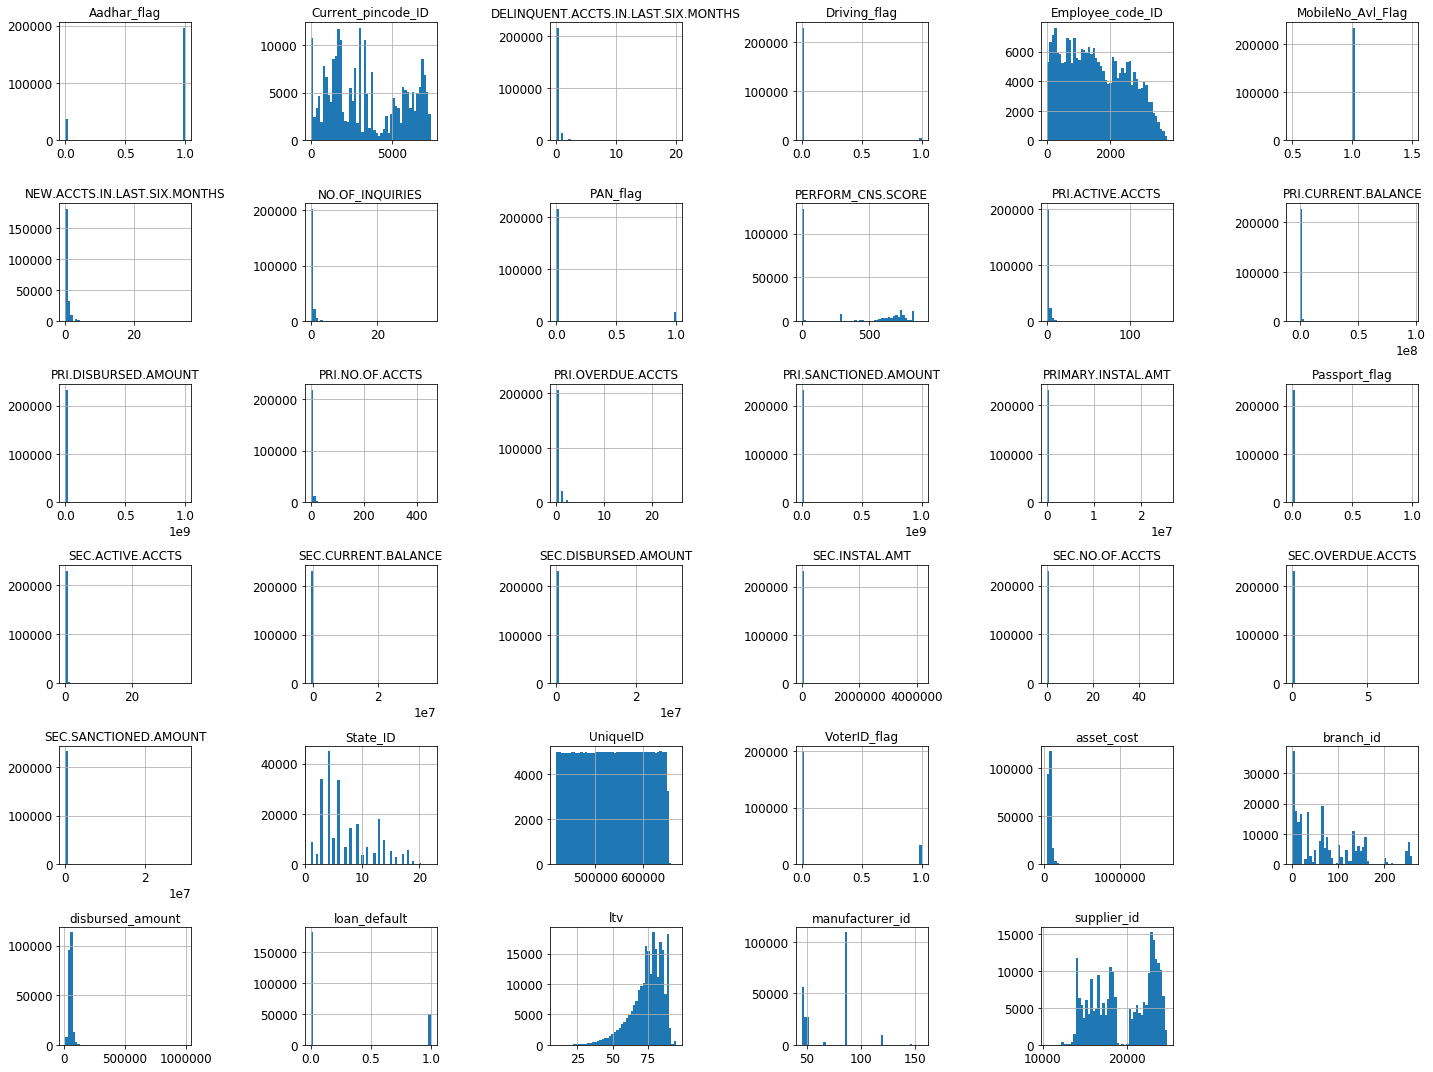

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt
ld.hist(bins=50, figsize=(20,15))
save_fig("ld_attribute_histogram_plots")
plt.show()

In [9]:
# to make this notebook's output identical at every run
np.random.seed(42)

In [10]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(ld, test_size=0.2, random_state=42)

In [11]:
corr_matrix = ld.corr()

In [12]:
corr_matrix["loan_default"].sort_values(ascending=False)

loan_default                           1.000000
ltv                                    0.098208
disbursed_amount                       0.077675
State_ID                               0.048075
VoterID_flag                           0.043747
NO.OF_INQUIRIES                        0.043678
PRI.OVERDUE.ACCTS                      0.040872
DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS    0.034462
UniqueID                               0.033848
branch_id                              0.030193
Current_pincode_ID                     0.028419
supplier_id                            0.027357
Employee_code_ID                       0.020657
asset_cost                             0.014261
PAN_flag                               0.002046
SEC.OVERDUE.ACCTS                     -0.001371
SEC.INSTAL.AMT                        -0.001548
SEC.CURRENT.BALANCE                   -0.005531
Driving_flag                          -0.005821
SEC.ACTIVE.ACCTS                      -0.005993
SEC.DISBURSED.AMOUNT                  -0

In [13]:
loan_deafault = train_set.drop("loan_default", axis=1)
loan_default_labels = train_set["loan_default"].copy()

In [14]:
loan_deafault_num = loan_deafault.drop(["Date.of.Birth","Employment.Type","DisbursalDate","PERFORM_CNS.SCORE.DESCRIPTION","AVERAGE.ACCT.AGE","CREDIT.HISTORY.LENGTH"], axis=1)

In [15]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")
imputer.fit(loan_deafault_num)

SimpleImputer(add_indicator=False, copy=True, fill_value=None,
              missing_values=nan, strategy='median', verbose=0)

In [16]:
#statistics_ holds the values OF THE MEDIAN OF ALL COLUMNS
imputer.statistics_

array([5.35957e+05, 5.38030e+04, 7.09590e+04, 7.68200e+01, 6.10000e+01,
       2.03330e+04, 8.60000e+01, 2.97000e+03, 6.00000e+00, 1.44800e+03,
       1.00000e+00, 1.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
       0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
       0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
       0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
       0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00])

In [17]:
#Check that this is the same as manually computing the median of each attribute:
loan_deafault_num.median().values

array([5.35957e+05, 5.38030e+04, 7.09590e+04, 7.68200e+01, 6.10000e+01,
       2.03330e+04, 8.60000e+01, 2.97000e+03, 6.00000e+00, 1.44800e+03,
       1.00000e+00, 1.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
       0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
       0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
       0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
       0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00])

In [18]:
#Now you can use this “trained” imputer to transform the training set by replacing missing values with the learned medians:
X = imputer.transform(loan_deafault_num)

In [19]:
#Now let's preprocess the categorical input feature, ocean_proximity:

In [20]:
loan_deafault_cat = loan_deafault[["Employment.Type","PERFORM_CNS.SCORE.DESCRIPTION"]]

In [21]:
# #removing nans from cat
# #loan_deafault_cat["Employment.Type"] =loan_deafault_cat["Employment.Type"].fillna("Self employed")
# #loan_deafault_cat["PERFORM_CNS.SCORE.DESCRIPTION"]= loan_deafault_cat["PERFORM_CNS.SCORE.DESCRIPTION"].fillna("No Bureau History Available")
# #loan_deafault_cat.info()

# from sklearn.impute import SimpleImputer
# imputer = SimpleImputer(strategy="most_frequent")
# imputer.fit(loan_deafault_cat)

In [23]:
# imputer.statistics_

In [24]:
# X_cat = imputer.transform(loan_deafault_cat)

In [22]:
from sklearn.preprocessing import OneHotEncoder

cat_encoder = OneHotEncoder()
loan_deafault_cat_1hot = cat_encoder.fit_transform(loan_deafault_cat)
loan_deafault_cat_1hot

<186523x22 sparse matrix of type '<class 'numpy.float64'>'
	with 373046 stored elements in Compressed Sparse Row format>

In [23]:
#to see the catagories
cat_encoder.categories_

[array(['Salaried', 'Self employed'], dtype=object),
 array(['A-Very Low Risk', 'B-Very Low Risk', 'C-Very Low Risk',
        'D-Very Low Risk', 'E-Low Risk', 'F-Low Risk', 'G-Low Risk',
        'H-Medium Risk', 'I-Medium Risk', 'J-High Risk', 'K-High Risk',
        'L-Very High Risk', 'M-Very High Risk',
        'No Bureau History Available',
        'Not Scored: More than 50 active Accounts found',
        'Not Scored: No Activity seen on the customer (Inactive)',
        'Not Scored: No Updates available in last 36 months',
        'Not Scored: Not Enough Info available on the customer',
        'Not Scored: Only a Guarantor',
        'Not Scored: Sufficient History Not Available'], dtype=object)]

In [24]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('std_scaler', StandardScaler()),
    ])



In [25]:
from sklearn.compose import ColumnTransformer

num_attribs = list(loan_deafault_num)
cat_attribs = ["Employment.Type","PERFORM_CNS.SCORE.DESCRIPTION"]

full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", OneHotEncoder(), cat_attribs),
    ])

loan_deafault_prepared = full_pipeline.fit_transform(loan_deafault)

In [26]:
loan_deafault_prepared

array([[ 1.42504766,  0.50422741, -0.01073538, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.61143981,  0.41686039, -0.12891739, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.80960356,  0.76341624,  0.86719567, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-1.02189297, -0.80612465, -0.78052121, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.64302665, -0.27318581, -0.36459829, ...,  0.        ,
         0.        ,  0.        ],
       [-0.50455847, -0.57621143, -0.04483948, ...,  0.        ,
         0.        ,  0.        ]])

In [27]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(loan_deafault_prepared, loan_default_labels)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [28]:
# let's try the full preprocessing pipeline on a few training instances
some_data = loan_deafault#.iloc[:10]
some_labels = loan_default_labels#.iloc[:10]
some_data_prepared = full_pipeline.transform(some_data)


predicted = log_reg.predict(some_data_prepared)
#print("Predictions:", log_reg.predict(some_data_prepared))

In [54]:
#compare the actaul labels to the predicted ones above
print("Labels:", list(some_labels))

Labels: [1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0

In [37]:
from sklearn.metrics import confusion_matrix

confusion_matrix(some_labels, predicted)

array([[145835,    231],
       [ 40278,    179]])

In [33]:
#now lets try a Stochastic Gradient Descent (SGD) classifier

from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(loan_deafault_prepared, loan_default_labels)


SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=42, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [35]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd_clf, loan_deafault_prepared, loan_default_labels, cv=3)

In [36]:
from sklearn.metrics import confusion_matrix

confusion_matrix(loan_default_labels, y_train_pred)

array([[146056,     10],
       [ 40456,      1]])